In [1]:
%cd ..

/home/jairo/Documentos/GitHub/kink-antikink-parellel


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from pathlib import Path

from modules.numerical import Diff, Grid

In [3]:
def read(filename):
    return pd.read_csv(filename, index_col=0)

def imshow(y, x, t, ax=None, **kwargs):
    (plt if ax == None else ax).imshow(y, extent=(t.min(), t.max(), x.min(), x.max()), origin='lower', **kwargs)

In [4]:
path = Path('data/dataset/')
files = tuple(path.glob('*'))

In [6]:
grid = Grid(-40, 40, N=1000)

In [186]:
i = np.random.randint(len(files))
df = read(files[i]).T
y = df.values
x = df.columns.values.astype(float)
t = df.index.values.astype(float)

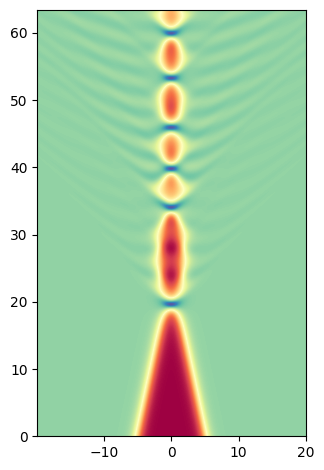

In [187]:
w = grid.window(-20, 20)
imshow(y[:, w], t, x[w], cmap='Spectral_r', aspect='equal')

plt.gcf().tight_layout()
plt.show()

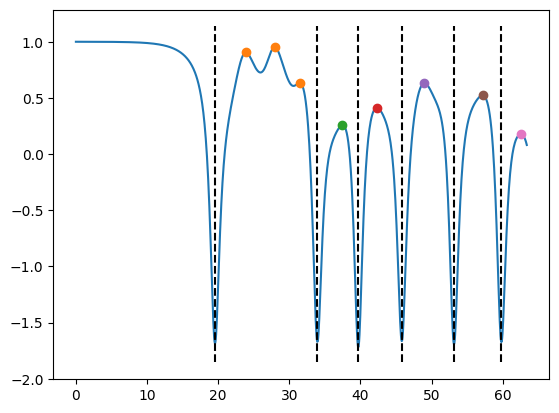

In [188]:
cm = y[:, grid.at(0)]
peaks, _ = find_peaks(cm**2, prominence=1.5)

plt.plot(t, cm)
plt.vlines(t[peaks], *plt.gca().get_ylim(), colors='k', linestyles='dashed')

for i in range(len(peaks) - 1):
    bounce = (t > t[peaks][i]) & (t < t[peaks][i+1])
    mini_peaks, _ = find_peaks(cm[bounce])
    plt.plot(t[bounce][mini_peaks], cm[bounce][mini_peaks], 'o')
bounce = t > t[peaks][-1]
mini_peaks, _ = find_peaks(cm[bounce])
plt.plot(t[bounce][mini_peaks], cm[bounce][mini_peaks], 'o')

plt.show()

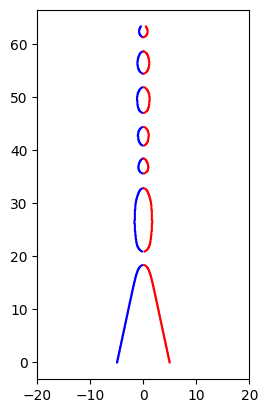

In [189]:
k1, k2 = [], []
for i in range(len(t)):
    x_slice = x[y[i] >= 0]
    if len(x_slice) == 0:
        k1.append(np.nan)
        k2.append(np.nan)
    else:
        k1.append(x_slice.min())
        k2.append(x_slice.max())

plt.plot(k1, t, 'b-')
plt.plot(k2, t, 'r-')
plt.gca().set_aspect('equal')
plt.xlim(-20, 20)

plt.show()